## Apply the Same Scaling to Other Data
Remembering the original parameters also allows us to apply the same transformation to other data.  

### Scenario:
- Our data science team created a predictive model for car break failure.  
- The numeric values of the training data, e.g. break pressure and deceleration, were Z-normalized prior to training.  
- We must transform the current operational data in the same way.  It is wrong to Z-normalize the operational data based on the mean and standard deviation of the operational data.  Instead, we need to use the same transformation that was used in training.  Therefore, we need to use the same transformation parameters that we used for training.

Sklearn normalization methods allow us to apply the same transformation to other data by separating the `fit` and `transform` functions.
    
What are values of operational population that is above 
What are the ages of the rejected students

The take-away lesson is: It is important to remember the normalization parameters so that the same transformation can be applied to other data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Historical Data (Variable 1)
sigma1 = 1
mu1a = 3
mu1b = 7
x1 = np.array(15)
x1 = np.append(x1, mu1a + sigma1*np.random.randn(100))
x1 = np.append(x1, mu1b + sigma1*np.random.randn(50))
x1 = x1.reshape(-1,1)

# Operational Data (Variable 2)
sigma2 = 1
mu2b = 7
x2 = np.array(-6)
x2 = np.append(x2, mu2b + sigma2*np.random.randn(50))
x2 = x2.reshape(-1,1)

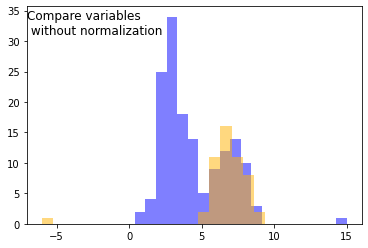

,Data Source,Min,Max,Mean,Std
0,Historical x1,0.4,15.00,4.46,2.22
1,Operational x2,-6.0,9.38,6.76,2.02


In [3]:
# Compare the historical variable with the operational data by overlaying histograms
plt.hist(x1, bins = 20, color=[0, 0, 1, 0.5])
plt.hist(x2, bins = 20, color=[1, 0.7, 0, 0.5])
plt.title("Compare variables \n without normalization", y=1.0, pad=-28, loc='left')
plt.show()

# Compare the historical variable with the operational data by listing distribution descriptions
XScales = []
XScales.append(['Historical x1', np.min(x1), np.max(x1), np.mean(x1), np.std(x1)])
XScales.append(['Operational x2', np.min(x2), np.max(x2), np.mean(x2), np.std(x2)])
display(pd.DataFrame(data=XScales, columns=['Data Source', 'Min', 'Max', 'Mean', 'Std']).round(decimals=2))

### Normalize the Historical Data (Variable 1)
The normalization parameters are determined from the historical data.  Based on these parameters, the historical data are normalized.

In [4]:
from sklearn.preprocessing import StandardScaler

ZScaler = StandardScaler()
ZScaler.fit(x1)
ZScaled_x1 = ZScaler.transform(x1)

### Normalize the Operational Data (Variable 2)
The normalization parameters were determined when only the historical data were available.  Therefore, we need to use the normalization parameters based on the historical data

In [5]:
# Transform operational data that was not used for determining normalization parameters
# ZScaler was fitted on historical data (x1)
Scaled_x2_BasedOn_x1 = ZScaler.transform(x2)

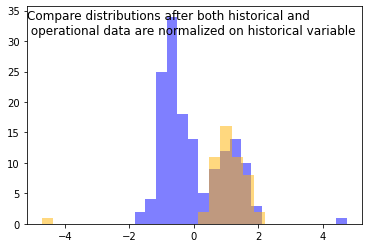

,Data Source,Min,Max,Mean,Std
0,Historical x1,-1.83,4.74,-0.00,1.00
1,Operational x2,-4.70,2.21,1.03,0.91


In [6]:
# Compare the distribution of the historical variable and the operational data after normalization on the historical variable
plt.hist(ZScaled_x1, bins = 20, color=[0, 0, 1, 0.5])
plt.hist(Scaled_x2_BasedOn_x1, bins = 20, color=[1, 0.7, 0, 0.5])
plt.title("Compare distributions after both historical and \n operational data are normalized on historical variable", y=1.0, pad=-28, loc='left')
plt.show()

# Compare the historical variable with the operational data by listing distribution descriptions
XScales = []
XScales.append(['Historical x1', np.min(ZScaled_x1), np.max(ZScaled_x1), np.mean(ZScaled_x1), np.std(ZScaled_x1)])
XScales.append(['Operational x2', np.min(Scaled_x2_BasedOn_x1), np.max(Scaled_x2_BasedOn_x1), np.mean(Scaled_x2_BasedOn_x1), np.std(Scaled_x2_BasedOn_x1)])
display(pd.DataFrame(data=XScales, columns=['Data Source', 'Min', 'Max', 'Mean', 'Std']).round(decimals=2))

The overlayed histograms before and after normalization look the same because the normalization parameters were the same for both the historic and operational data.  The distribution descriptions have changed due to the normalization.